In [235]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [236]:
df = pd.read_csv ('/content/cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 418 entries, 0 to 417

Data columns (total 20 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   ID             418 non-null    int64  

 1   N_Days         418 non-null    int64  

 2   Status         418 non-null    object 

 3   Drug           312 non-null    object 

 4   Age            418 non-null    int64  

 5   Sex            418 non-null    object 

 6   Ascites        312 non-null    object 

 7   Hepatomegaly   312 non-null    object 

 8   Spiders        312 non-null    object 

 9   Edema          418 non-null    object 

 10  Bilirubin      418 non-null    float64

 11  Cholesterol    284 non-null    float64

 12  Albumin        418 non-null    float64

 13  Copper         310 non-null    float64

 14  Alk_Phos       312 non-null    float64

 15  SGOT           312 non-null    float64

 16  Tryglicerides  282 non-null    float64

 17  Platelets      407 non-null    f

In [238]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [239]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [240]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [241]:
df.duplicated().sum()

0

In [ ]:
df.drop(['ID',"N_Days"], axis=1, inplace=True)

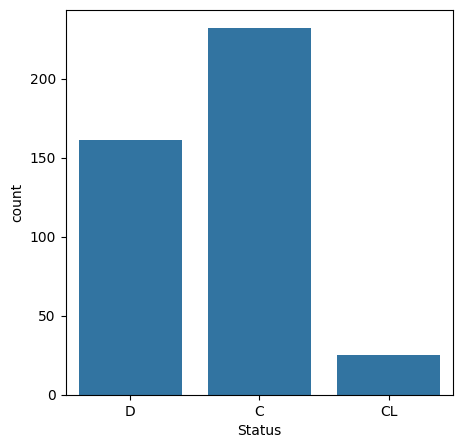

In [243]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status', data =df)
plt.show()

In [ ]:
X= df.drop('Status', axis=1)
y = df['Status']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

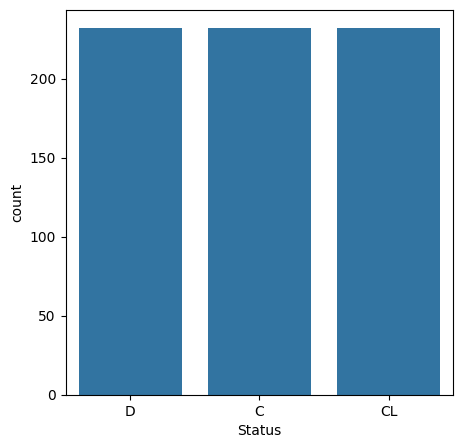

In [245]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status', data =df)
plt.show()

In [246]:
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: Status

D     232

C     232

CL    232

Name: Status, dtype: int64



Column: Drug

D-penicillamine    256

Placebo            254

Name: Drug, dtype: int64



Column: Sex

F    622

M     74

Name: Sex, dtype: int64



Column: Ascites

N    479

Y     31

Name: Ascites, dtype: int64



Column: Hepatomegaly

Y    283

N    227

Name: Hepatomegaly, dtype: int64



Column: Spiders

N    357

Y    153

Name: Spiders, dtype: int64



Column: Edema

N    589

S     84

Y     23

Name: Edema, dtype: int64




In [247]:
def colchange(df):
    df['Sex'] = df['Sex'].replace(['F', 'M'], [0, 1])
    df['Sex'] = pd.to_numeric(df['Sex'])

    df['Ascites'] = df['Ascites'].replace(['N', 'Y'], [0, 1])
    df['Ascites'] = pd.to_numeric(df['Ascites'])

    df['Hepatomegaly'] = df['Hepatomegaly'].replace(['N', 'Y'], [0, 1])
    df['Hepatomegaly'] = pd.to_numeric(df['Hepatomegaly'])

    df['Spiders'] = df['Spiders'].replace(['N', 'Y'], [0, 1])
    df['Spiders'] = pd.to_numeric(df['Spiders'])

    df['Edema'] = df['Edema'].replace(['N', 'S', 'Y'], [0.2, 0.4, 0.6])
    df['Edema'] = pd.to_numeric(df['Edema'])

    df['Drug'] = df['Drug'].replace(['D-penicillamine', 'Placebo'], [0, 1])
    df['Drug'] = pd.to_numeric(df['Drug'])
    return df

df = colchange(df)


df['Status'] =df['Status'].replace(['C', 'CL', 'D'], [0, 1, 2])
df['Status'] = pd.to_numeric(df['Status'])

In [248]:
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: Status

2    232

0    232

1    232

Name: Status, dtype: int64



Column: Drug

0.0    256

1.0    254

Name: Drug, dtype: int64



Column: Sex

0    622

1     74

Name: Sex, dtype: int64



Column: Ascites

0.0    479

1.0     31

Name: Ascites, dtype: int64



Column: Hepatomegaly

1.0    283

0.0    227

Name: Hepatomegaly, dtype: int64



Column: Spiders

0.0    357

1.0    153

Name: Spiders, dtype: int64



Column: Edema

0.2    589

0.4     84

0.6     23

Name: Edema, dtype: int64




In [249]:
df.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,NaN,25202,0,NaN,NaN,NaN,0.2,4.2,NaN,3.19,NaN,NaN,NaN,NaN,120.0,11.1,4.0,2
1,NaN,19724,0,NaN,NaN,NaN,0.2,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0,0
2,1.0,13918,0,0.0,1.0,1.0,0.2,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1
3,0.0,12839,1,0.0,0.0,0.0,0.2,3.5,325.0,3.98,444.0,766.0,130.20,210.0,344.0,10.6,3.0,1
4,0.0,15031,0,0.0,0.0,0.0,0.2,5.5,528.0,4.18,77.0,2404.0,172.05,78.0,467.0,10.7,3.0,1


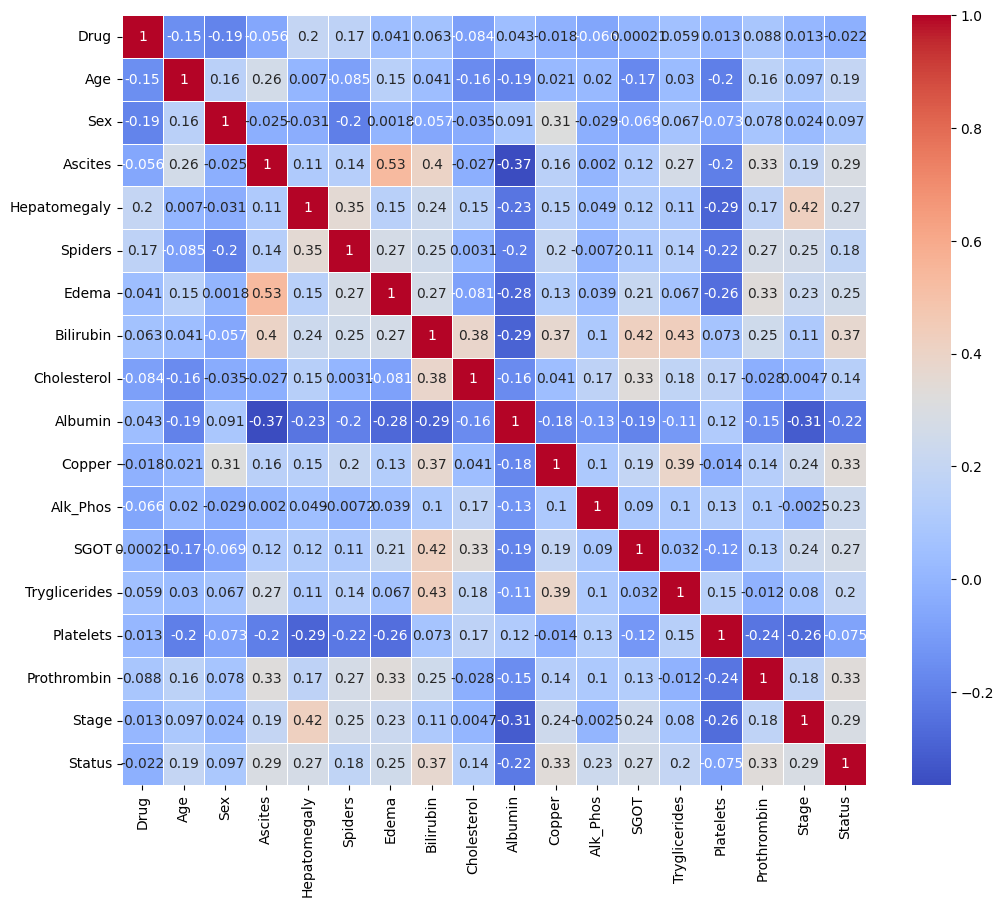

In [250]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

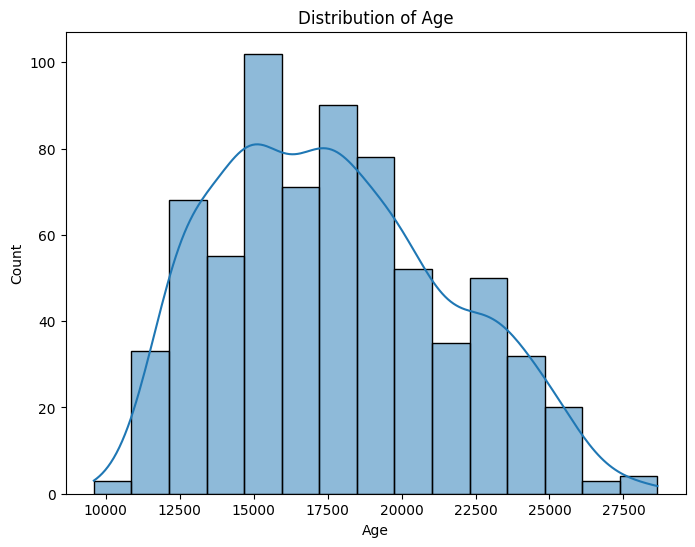

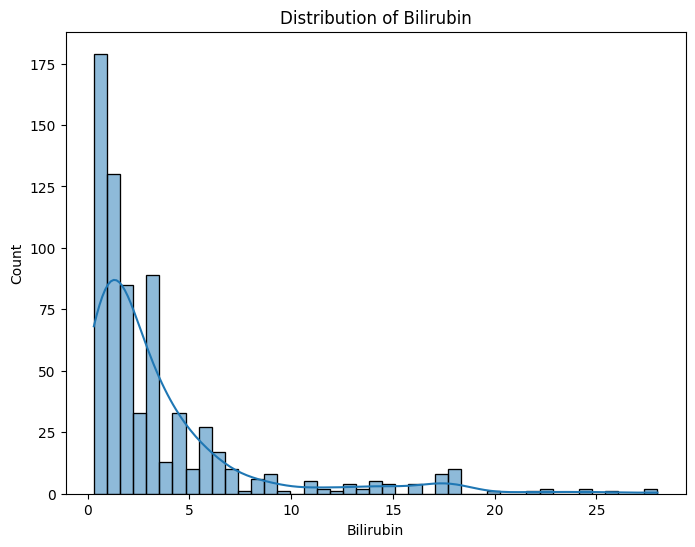

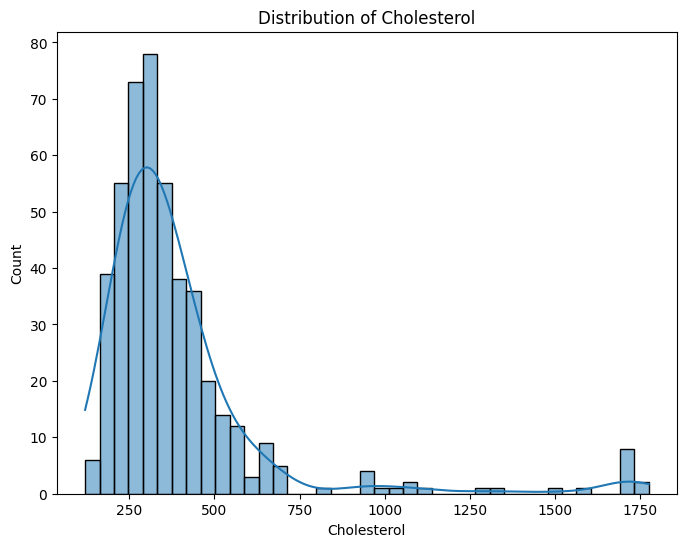

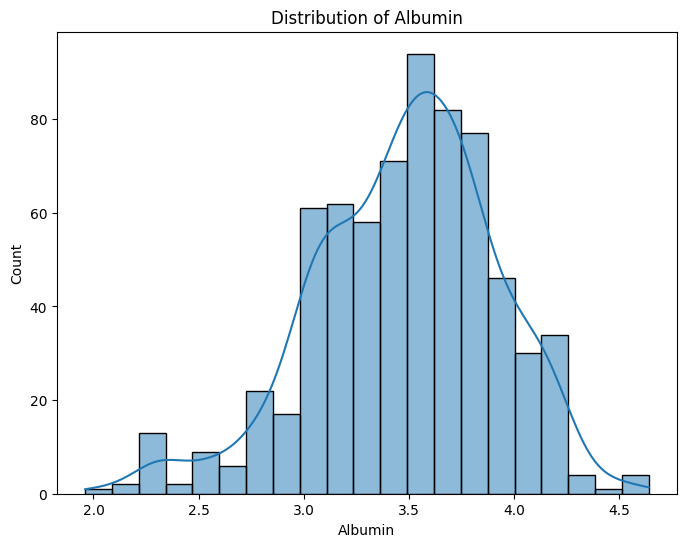

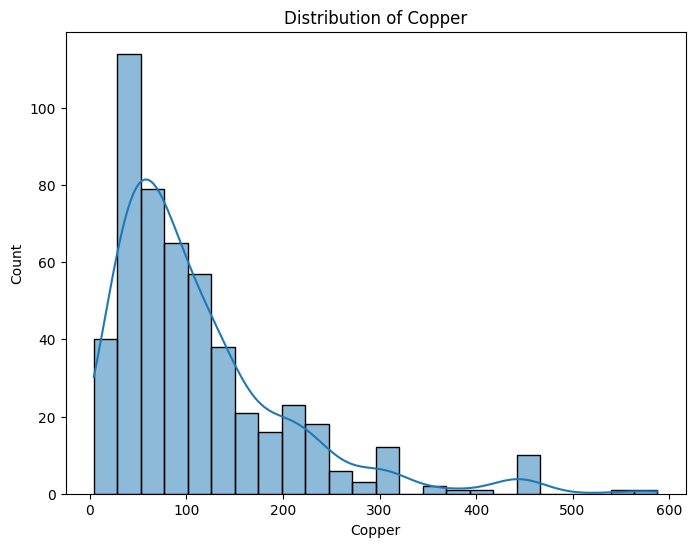

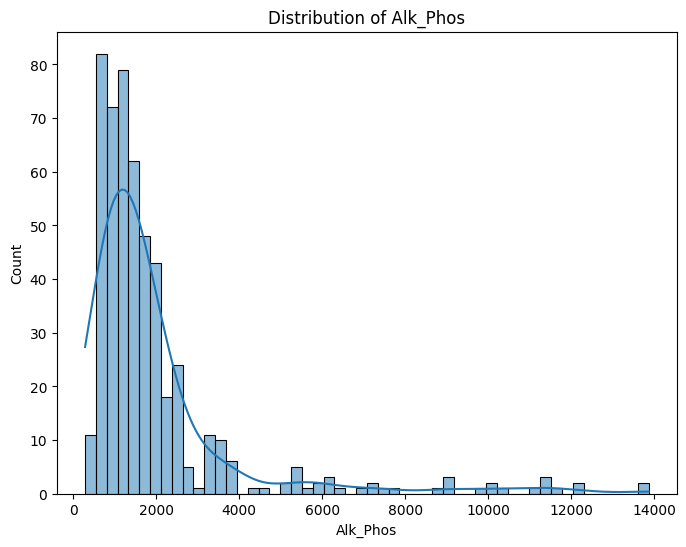

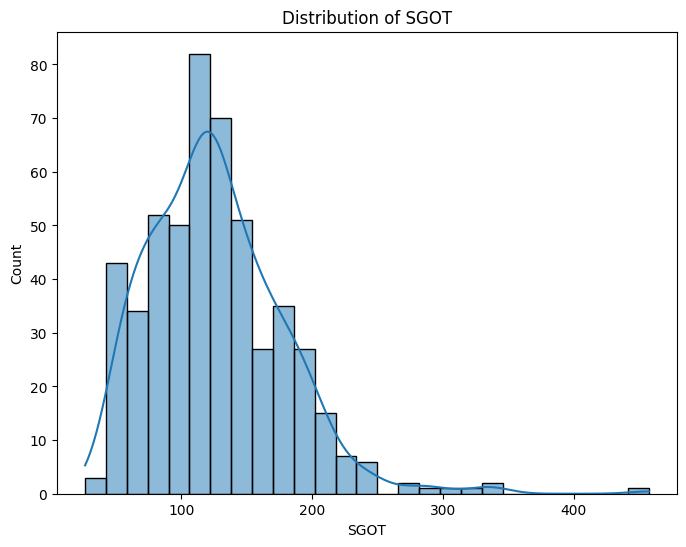

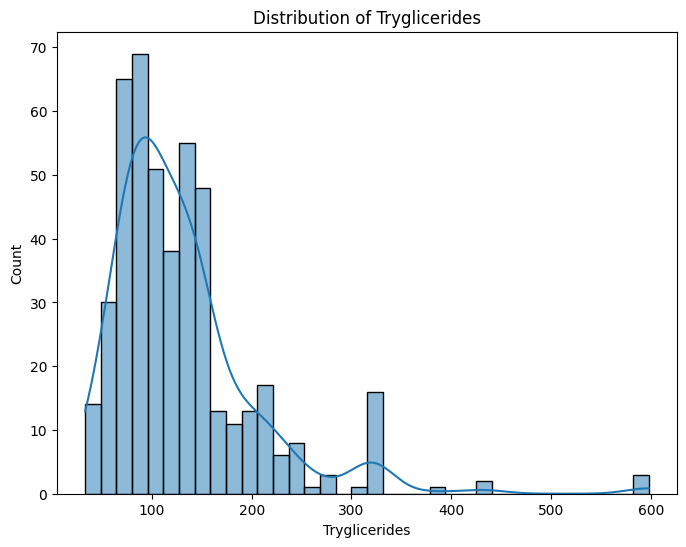

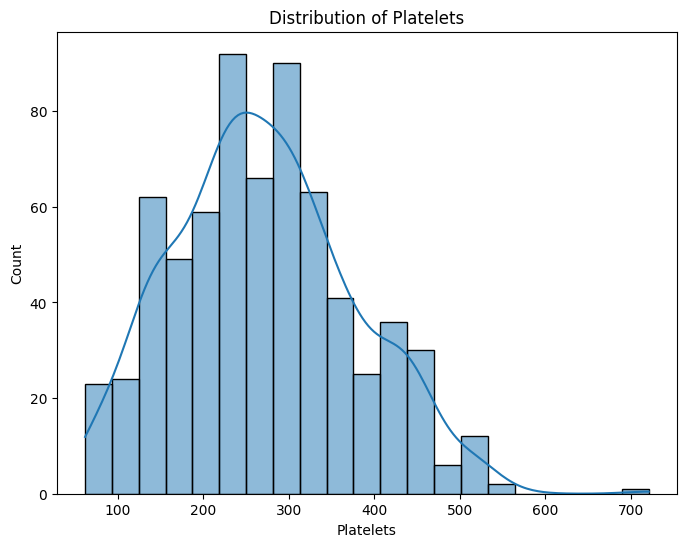

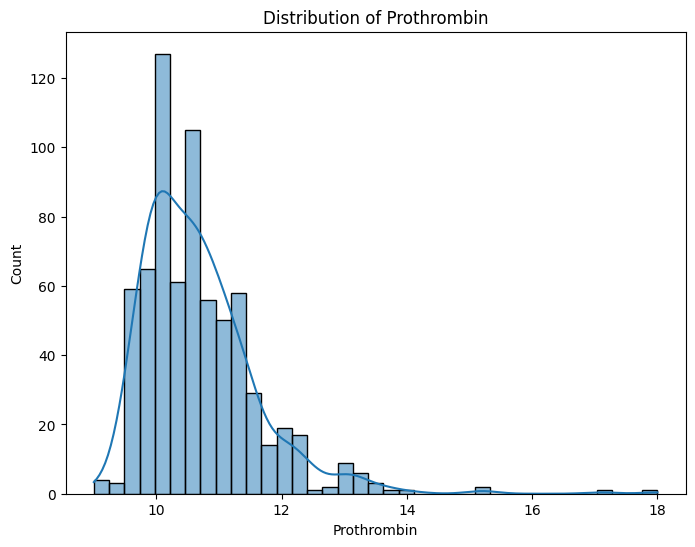

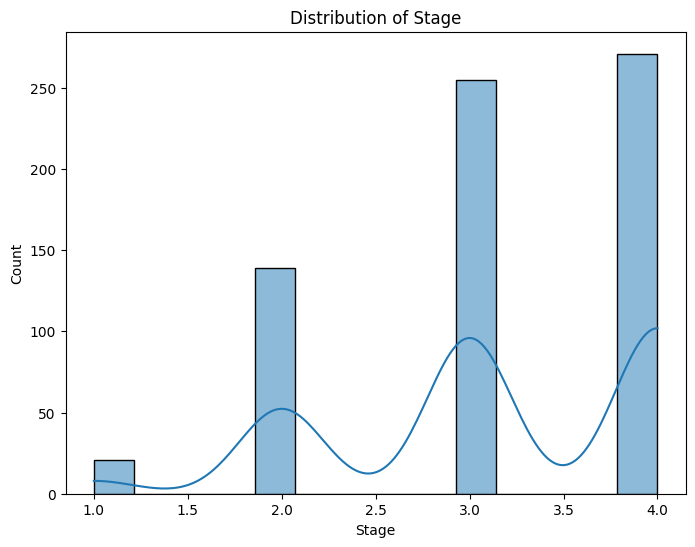

In [251]:
numeric_columns = [ 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [ ]:
sns.countplot(x='Status', hue='Sex', data=df)
plt.title("Count of Status based on Sex")
plt.show()

In [252]:
label_encoder = LabelEncoder()
for column in df:
    df[column] = label_encoder.fit_transform(df[column])

In [253]:
df = df.dropna(subset=['Drug'])


In [254]:
columns_to_fill = ['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

In [255]:
X = df.drop(['Status'],axis=1)

y = df['Status']


In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [257]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [258]:

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))
y_pred1 = xgb.predict(X_test)

1.0


In [259]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [260]:
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'SVM Accuracy: {xgb_accuracy:.2f}')

SVM Accuracy: 0.84


[[35  2 12]

 [ 0 49  0]

 [ 8  1 33]]


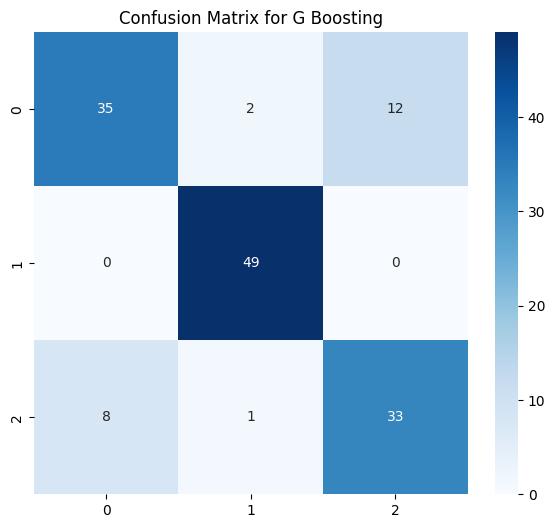

In [261]:
cm = confusion_matrix(y_test,xgb_predictions)
print(cm)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for G Boosting')
plt.show()

In [262]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [263]:
y_pred = clf.predict(X_test)

G_accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {G_accuracy:.2f}")

Accuracy: 0.82


[[35  3 11]

 [ 0 49  0]

 [ 8  3 31]]


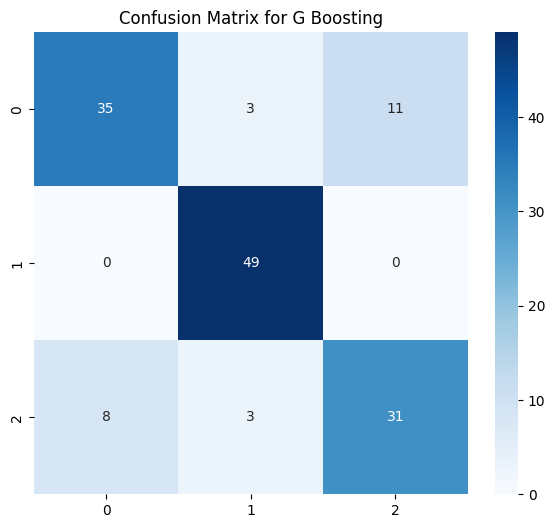

In [264]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for G Boosting')
plt.show()


In [265]:

svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)


SVC()

In [266]:

svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

SVM Accuracy: 0.75


[[34  5 10]

 [ 3 46  0]

 [ 9  8 25]]


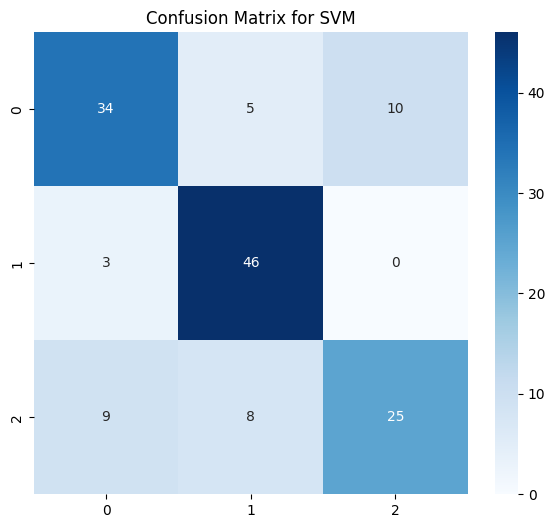

In [267]:
cm = confusion_matrix(y_test, svm_predictions)
print(cm)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()

In [268]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)

LogisticRegression()

In [269]:
Logistic_predictions=Logistic_Regression.predict(X_test)
Logistic_accuracy=accuracy_score(y_test, Logistic_predictions)
print(f'Logistic_accuracy: {Logistic_accuracy:.2f}')

Logistic_accuracy: 0.68


[[26 10 13]

 [ 7 42  0]

 [ 6  9 27]]


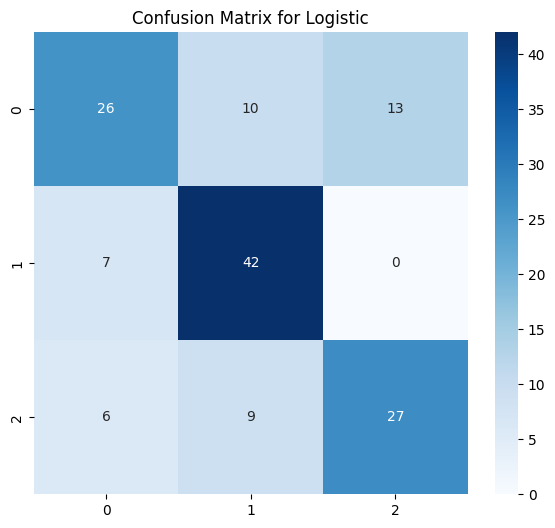

In [270]:
cm = confusion_matrix(y_test,Logistic_predictions)
print(cm)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, Logistic_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic')
plt.show()

In [271]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [272]:
prediction3=rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, prediction3)
print(f'Logistic_accuracy: {rfc_acc:.2f}')

Logistic_accuracy: 0.84


[[36  1 12]

 [ 0 49  0]

 [ 8  1 33]]


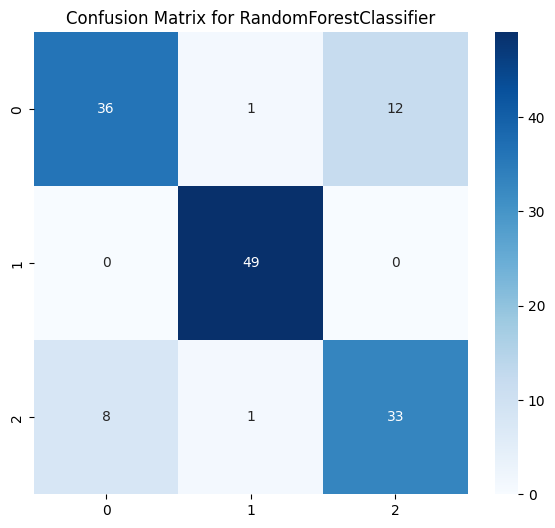

In [273]:
cm = confusion_matrix(y_test, prediction3)
print(cm)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, prediction3), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()